## Scrubber Discharge Project
Exploring the output files generated by the Salish Sea Atlantis Model
for Scrubber Discharge Project - preliminary runs (updated March 2023)

- scenario 1: 1-year discharge for Jan 2019 - Dec 2019
- scenario 2: 5-year discharge for Jan 2019 - Dec 2024
- scenario 3: 10-year discharge for Jan 2019 - Dec 2029

In [2]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups
import ssam_plot as splot

### Define scenario and control files

In [3]:
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_control/outputSalishSea.nc"
scenario2019_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2019/outputSalishSea.nc"
scenario2024_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2024/outputSalishSea.nc"
scenario2029_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2029/outputSalishSea.nc"

control      = xr.open_dataset(str(control_file), decode_cf=True)
scenario2019 = xr.open_dataset(str(scenario2019_file), decode_cf=True)
scenario2024 = xr.open_dataset(str(scenario2024_file), decode_cf=True)
scenario2029 = xr.open_dataset(str(scenario2029_file), decode_cf=True)

time = np.ma.filled(scenario2019.variables['t'], np.nan)

In [4]:
#t_corrected = t - np.timedelta64(578, 'D')

start = 40 #112
end =  120 #t.size-1

event_start = np.datetime64('2019-08-01')

In [5]:
scenarios = [scenario2019, scenario2024, scenario2029]

In [5]:
print(time[63], time[83], time[103])

2022-09-07T14:00:00.000000000 2027-09-01T14:00:00.000000000 2032-08-25T14:00:00.000000000


In [6]:
days = [63, 83, 103]
data = {'2019': [], '2024': [],'2029': []}

Phenanthrene concentrations in each scenario

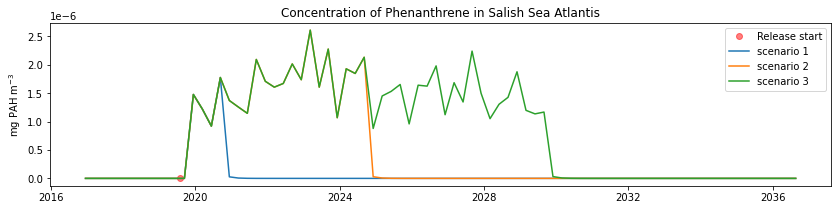

In [8]:
splot.compare_pah('Phenanthrene', scenarios, time, start, end, event_start)

Lower trophic levels

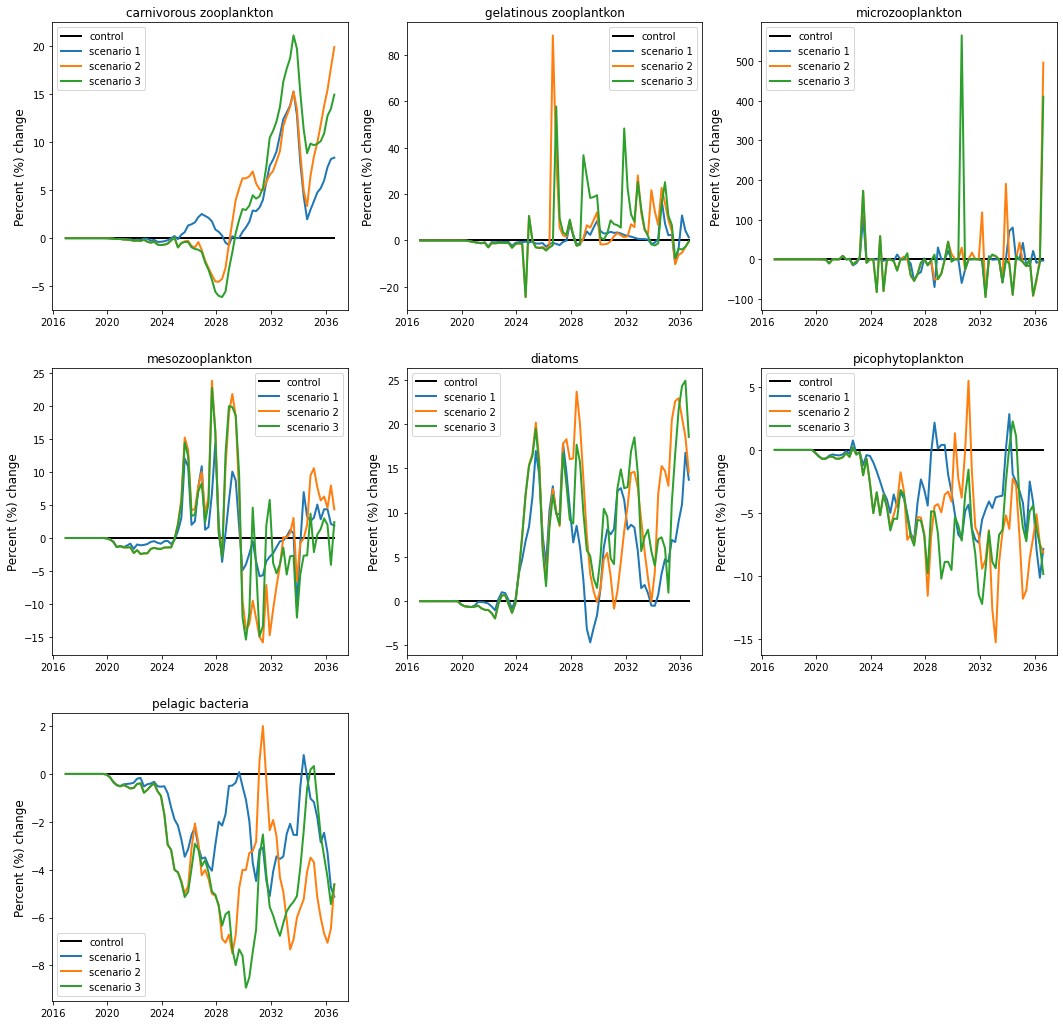

In [5]:
splot.pelagic_compare_scenarios(groups.plankton, scenarios, control, time, start, end, y_min=None, y_max=None)

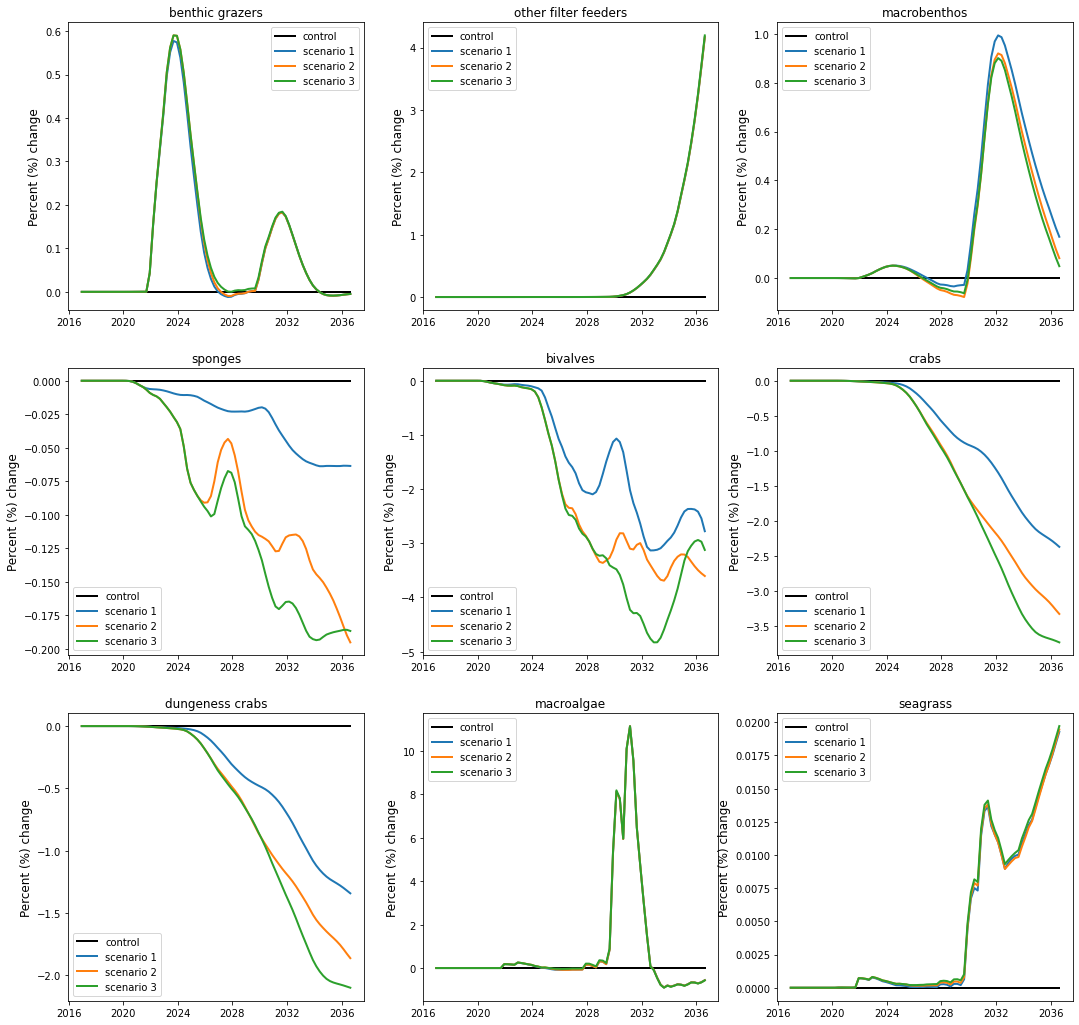

In [10]:
splot.benthic_compare_scenarios(groups.benthos, scenarios, control,time, start, end, y_min=None, y_max=None)

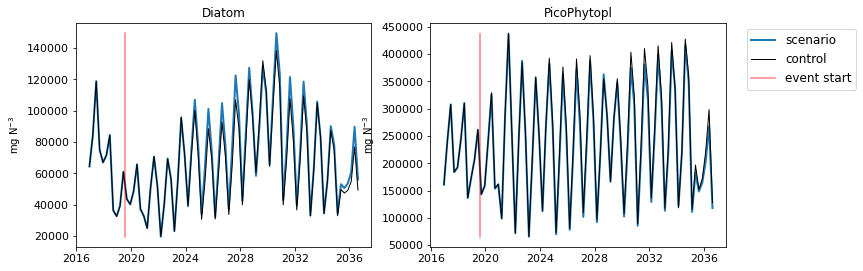

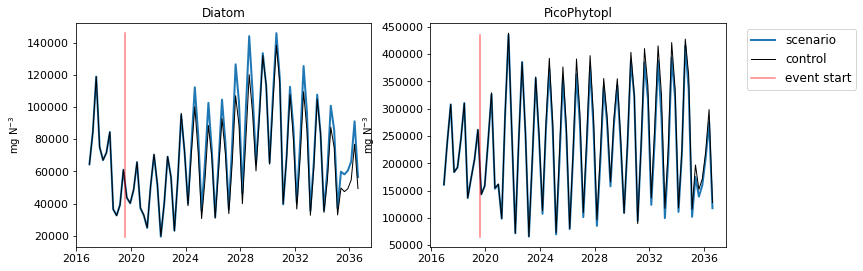

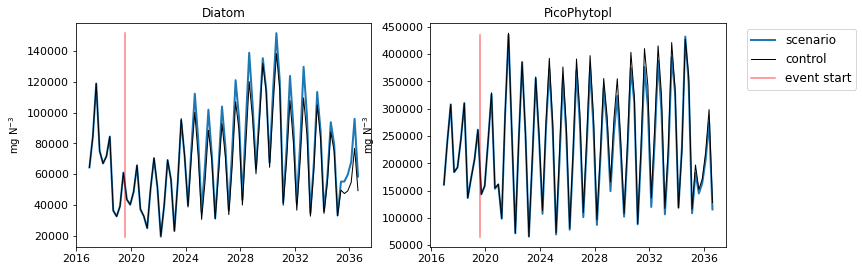

In [26]:
for scenario in scenarios:
    splot.plot_pelagic_biomass(groups.phytoplankton, scenario, control, time, start, end, event_start)

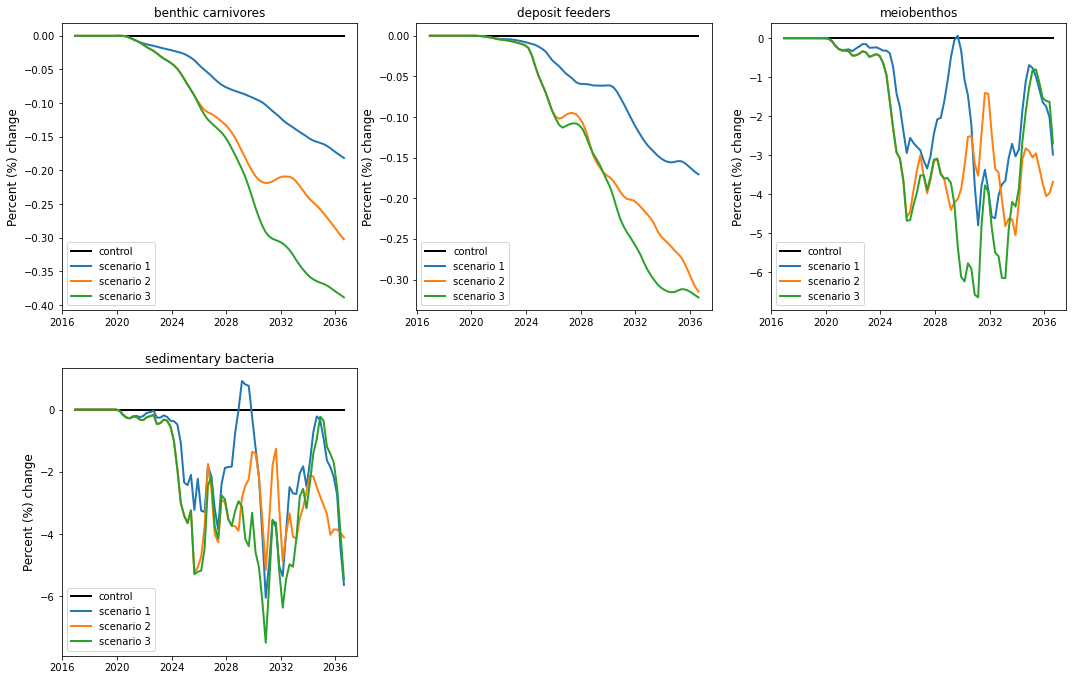

In [13]:
splot.sediment_compare_scenarios(groups.sediment_feeders, scenarios, control, time, start, end)


Years 2019-2029

In [14]:
end2029 =  91 #t.size-1 # numpy.datetime64('2029-08-29T14:00:00.000000000')

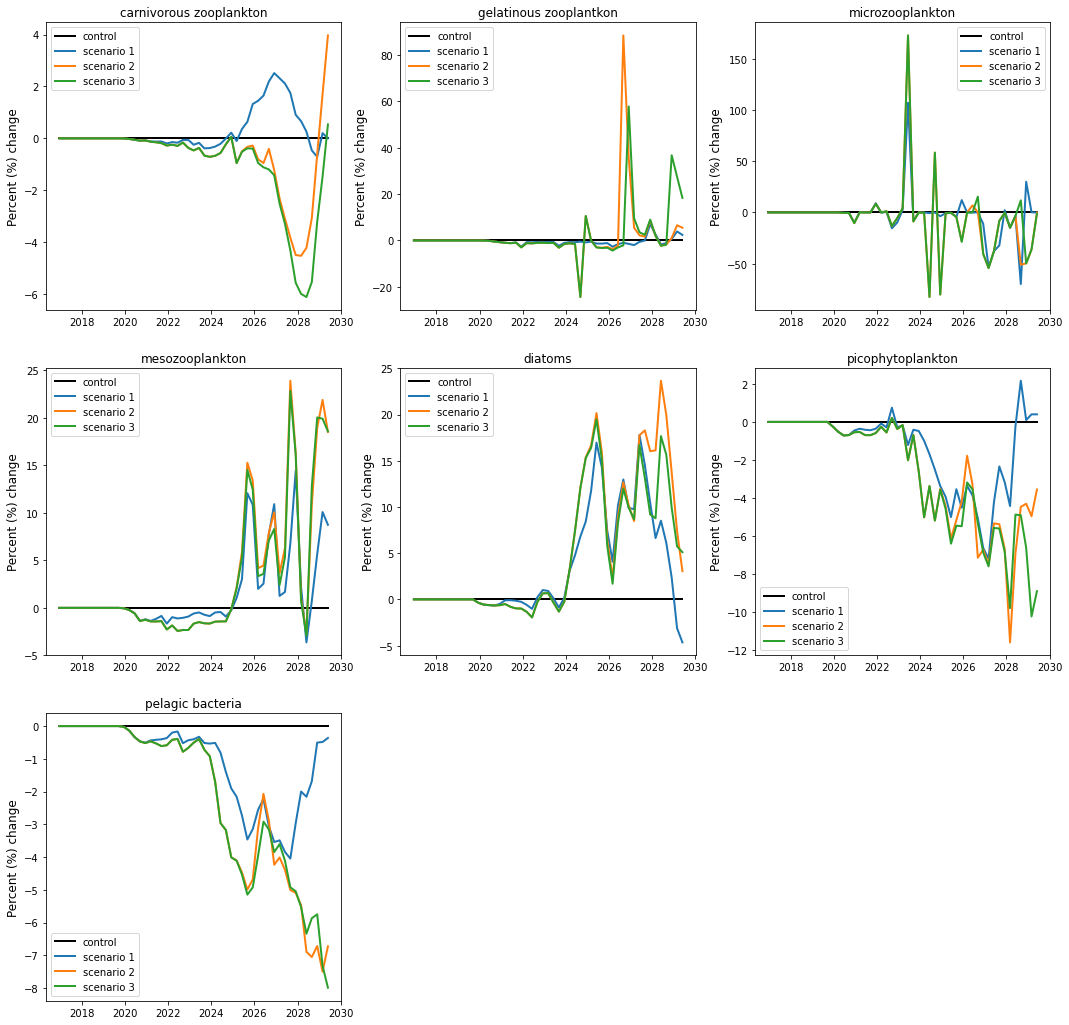

In [15]:
splot.pelagic_compare_scenarios(groups.plankton, scenarios, control, time, start, end2029, y_min=None, y_max=None)

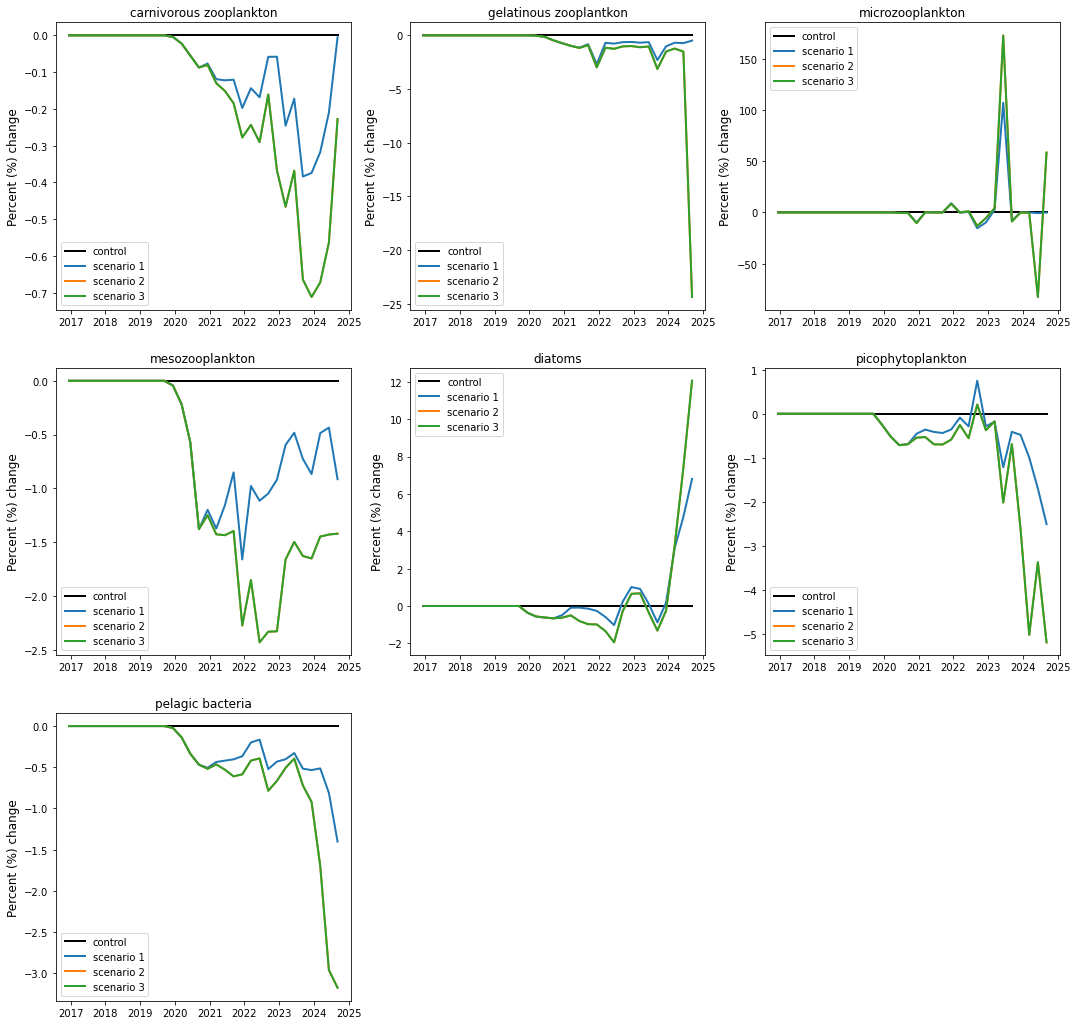

In [16]:
end2024 =  72 #t.size-1
splot.pelagic_compare_scenarios(groups.plankton, scenarios, control, time, start, end2024)

In [17]:
print(time[55], time[75], time[95], time[220] )

2020-09-09T14:00:00.000000000 2025-09-03T14:00:00.000000000 2030-08-28T14:00:00.000000000 2061-10-19T14:00:00.000000000


In [6]:
days = [55, 75, 95, 220]
data = {'initial year of discharge': [], '5 years later': [],'10 years later': [], '50 years later': []}

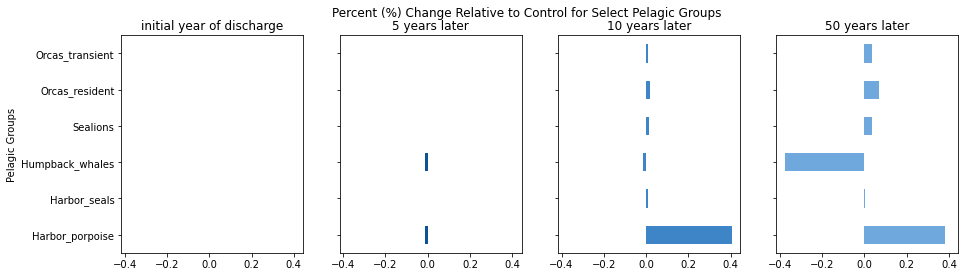

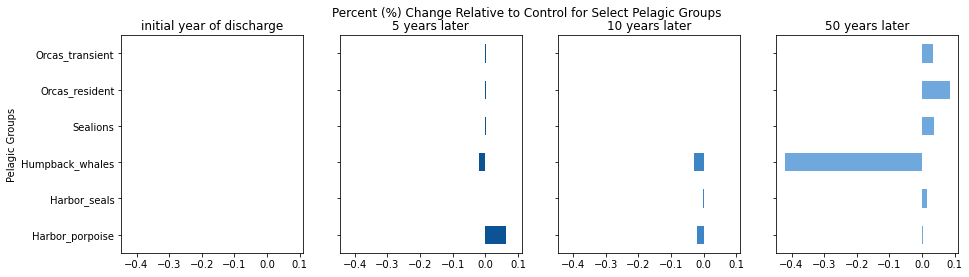

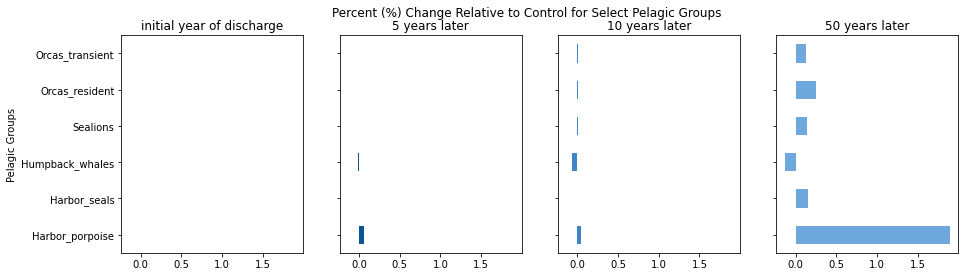

In [20]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.mammals,scenario,control,start,days,data)

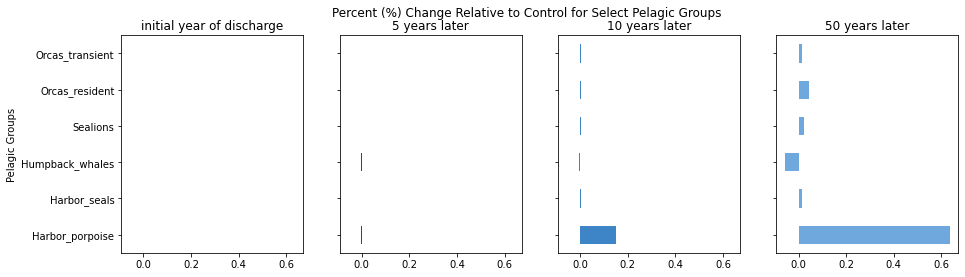

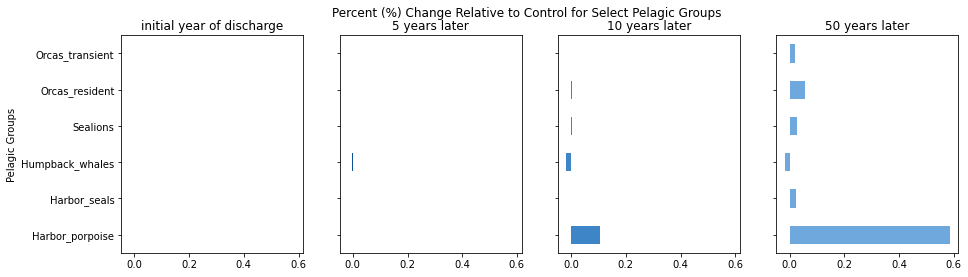

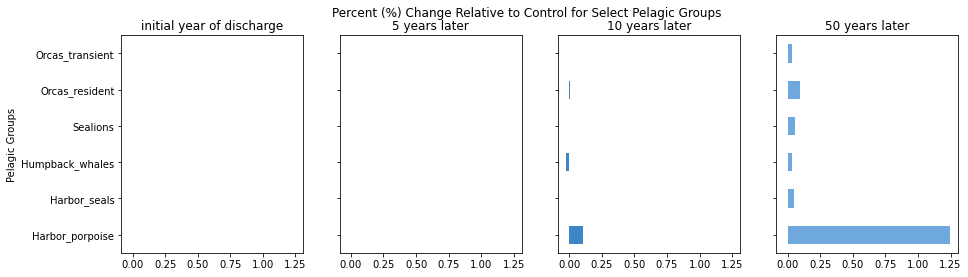

In [8]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.mammals,scenario,control,start,days,data)

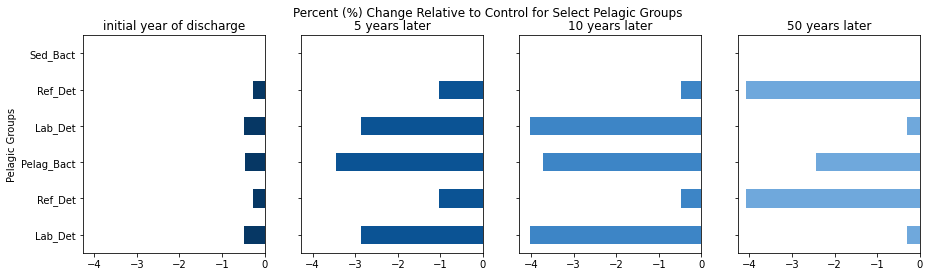

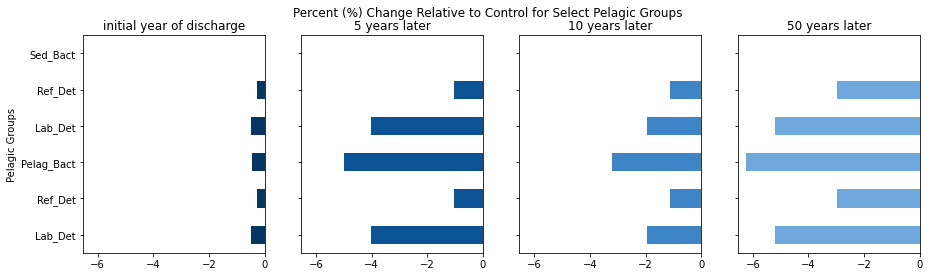

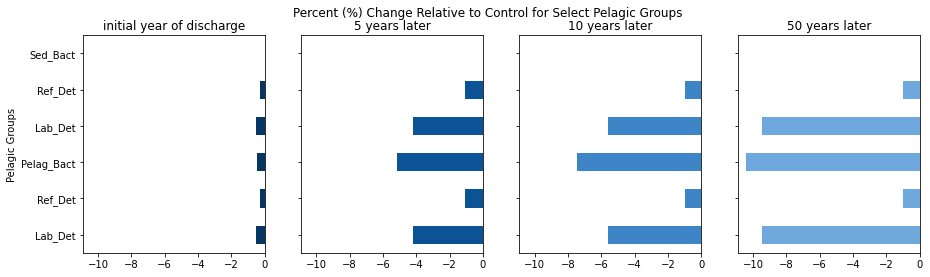

In [21]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.bacteria, scenario, control, days, data)

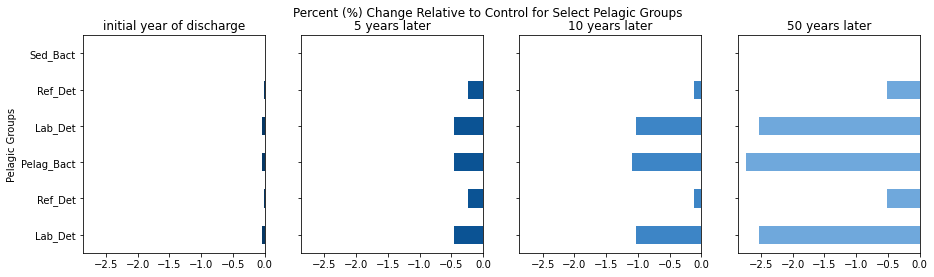

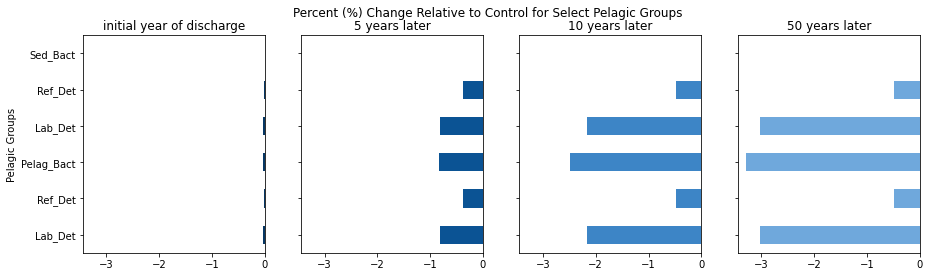

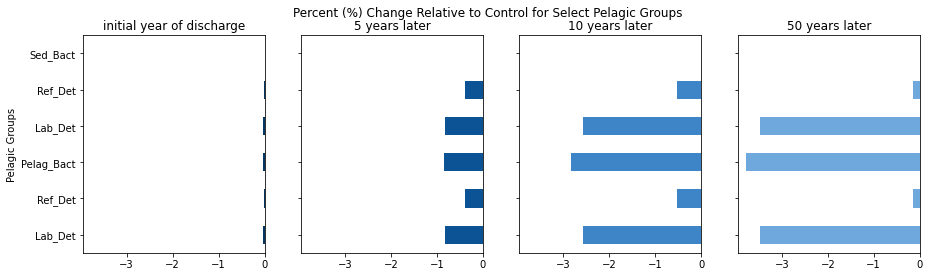

In [9]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.bacteria, scenario, control, start, days, data)

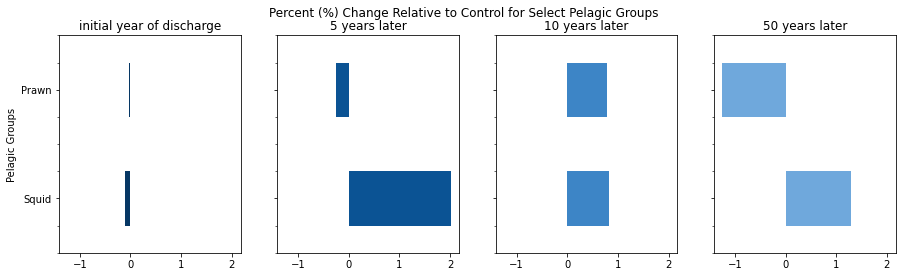

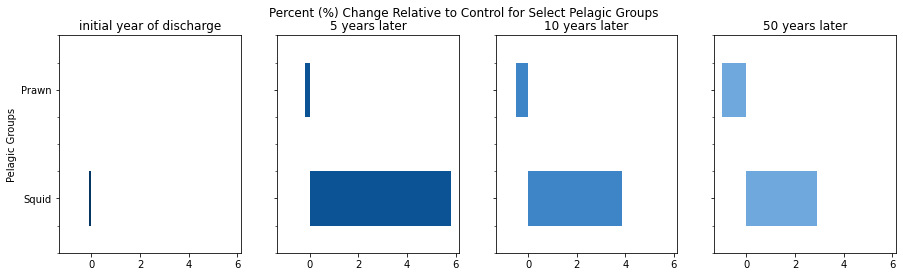

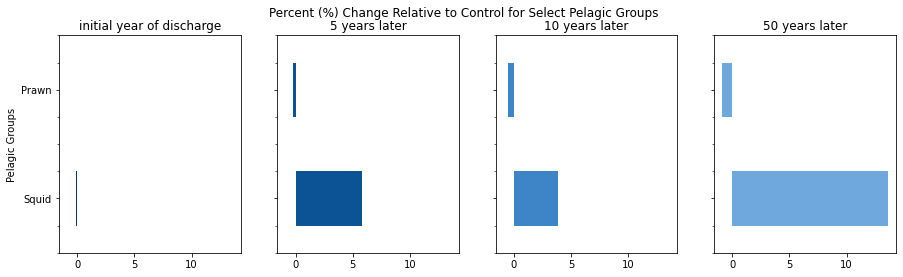

In [23]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.pelagic_invertebrates, scenario, control, days, data)

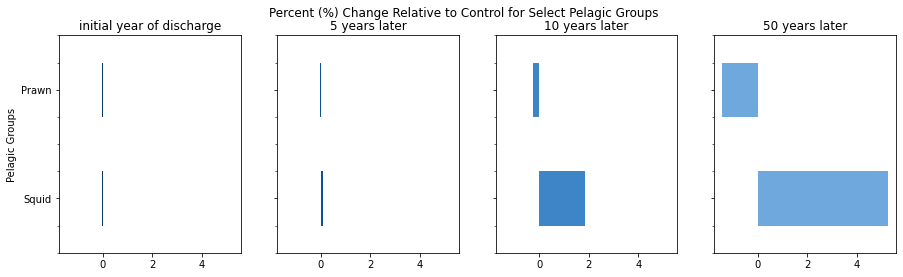

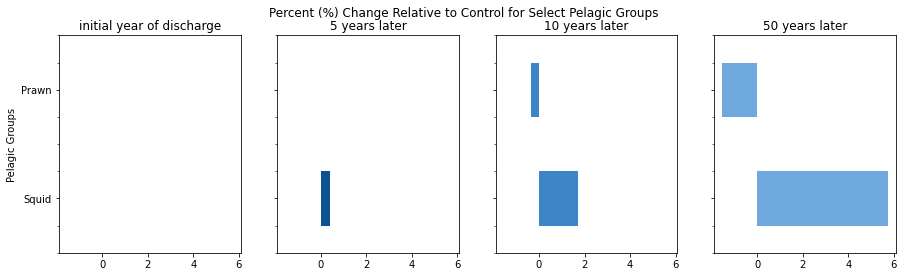

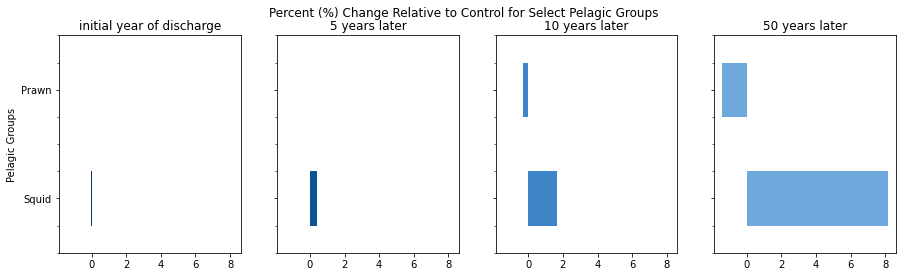

In [10]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.pelagic_invertebrates, scenario, control, start, days, data)

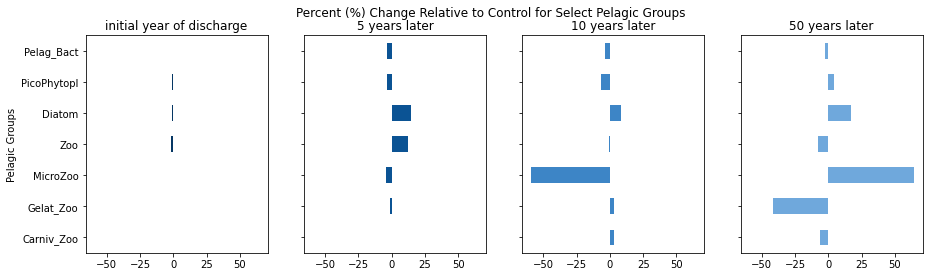

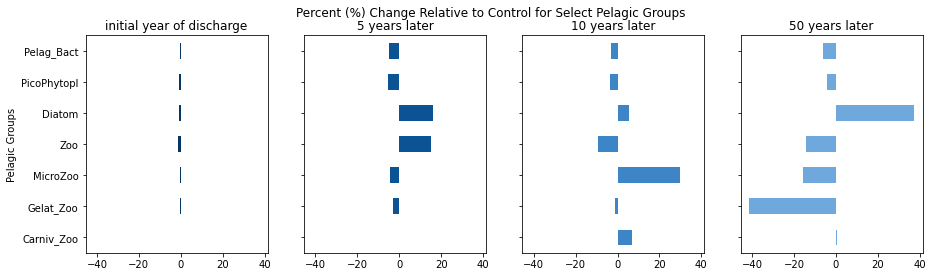

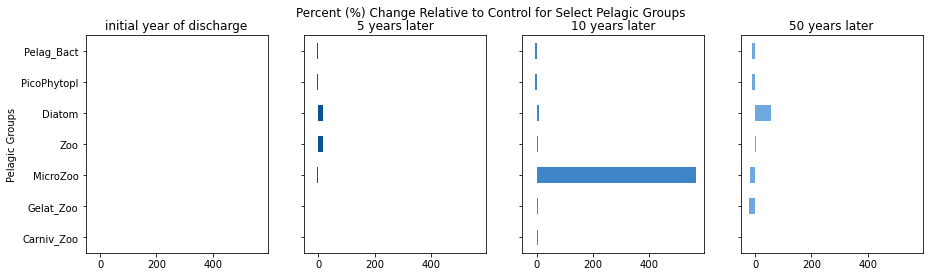

In [24]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.plankton, scenario, control, days, data)

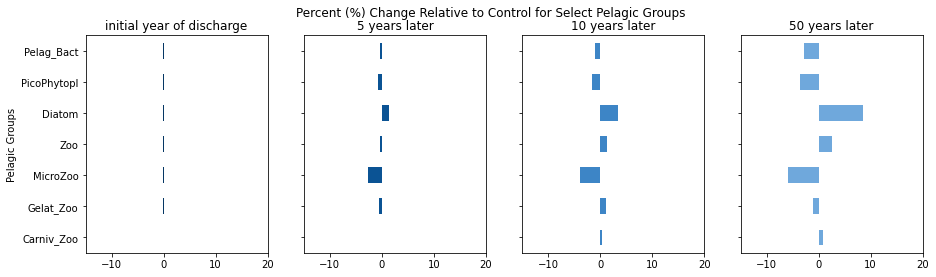

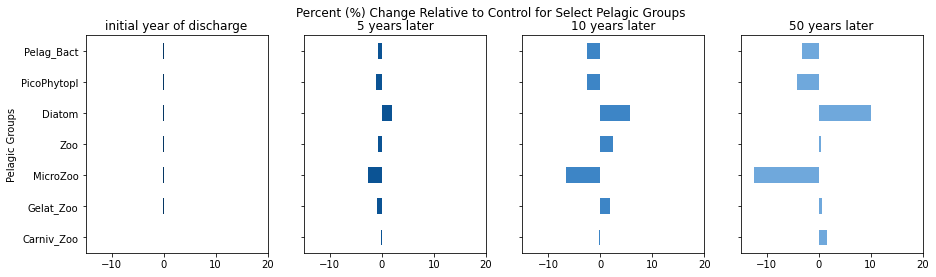

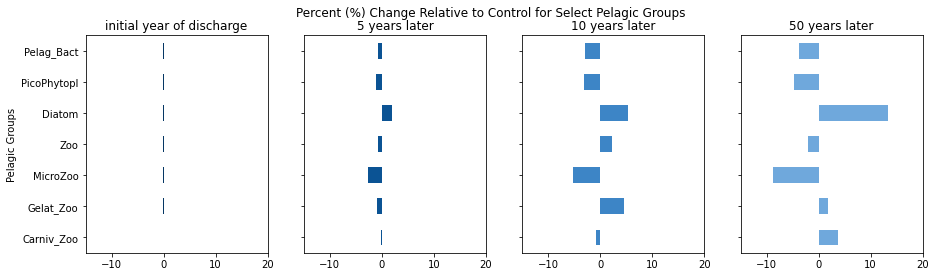

In [30]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.plankton, scenario, control, start, days, data, x_lim=[-15,20])

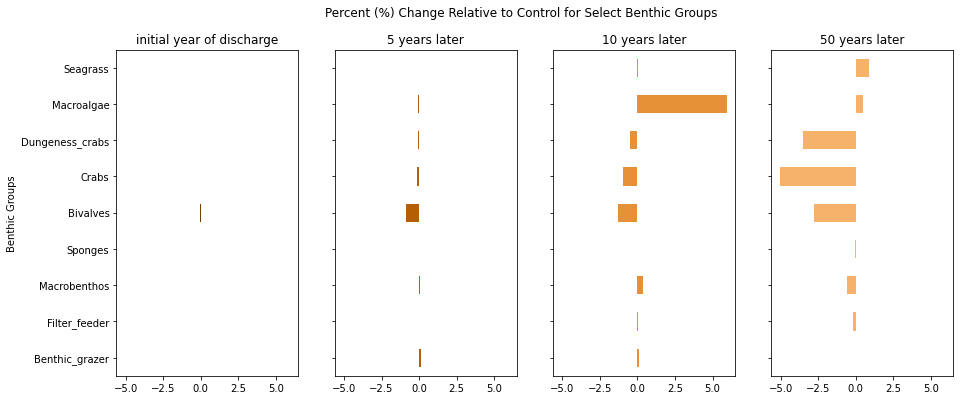

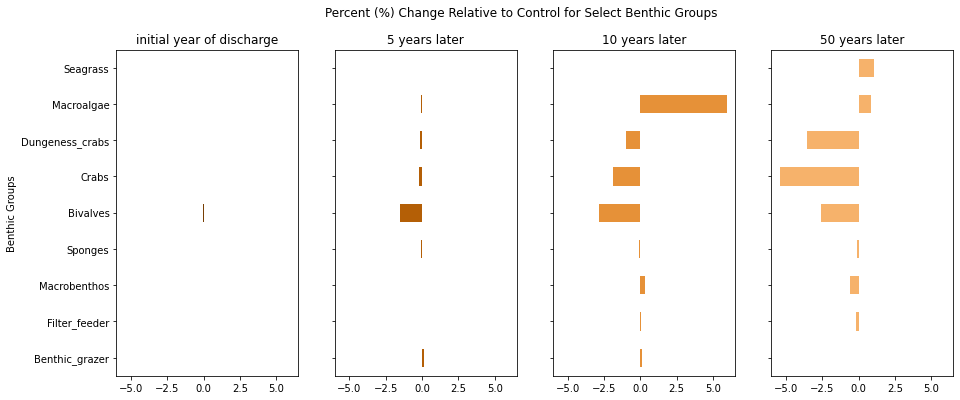

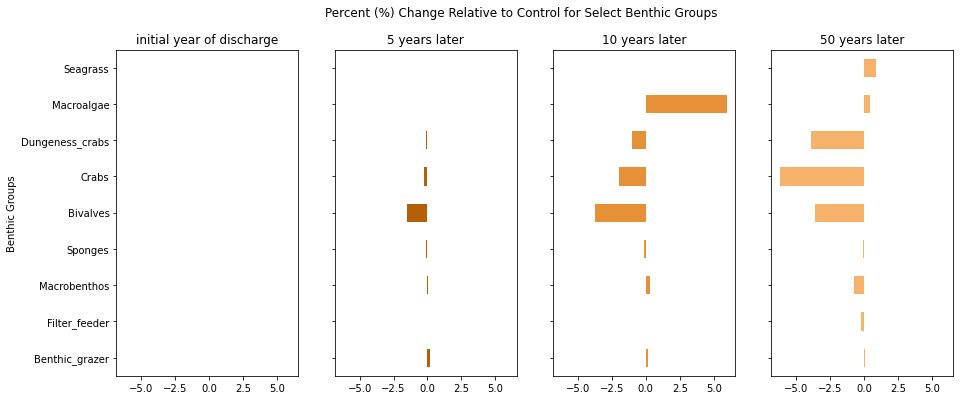

In [25]:
for scenario in scenarios:
    splot.boxplot_benthic(groups.benthos, scenario, control, days, data)

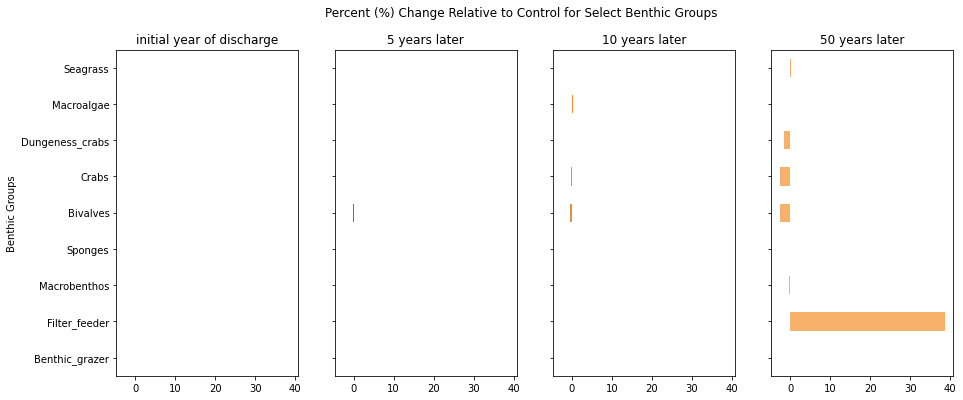

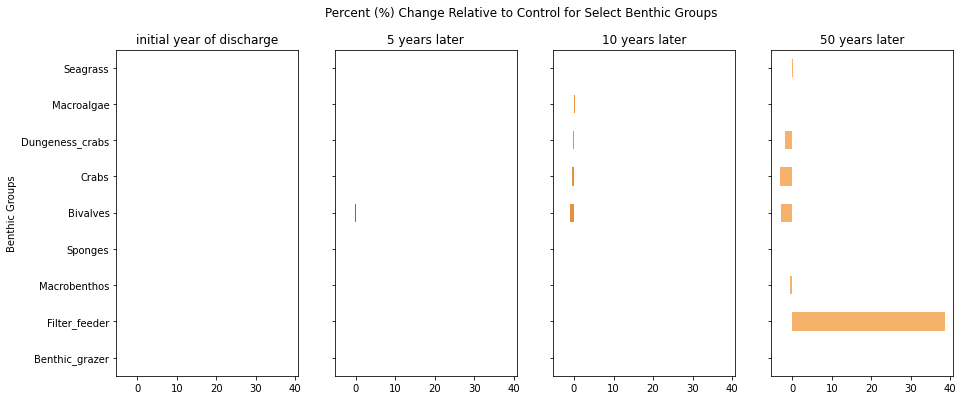

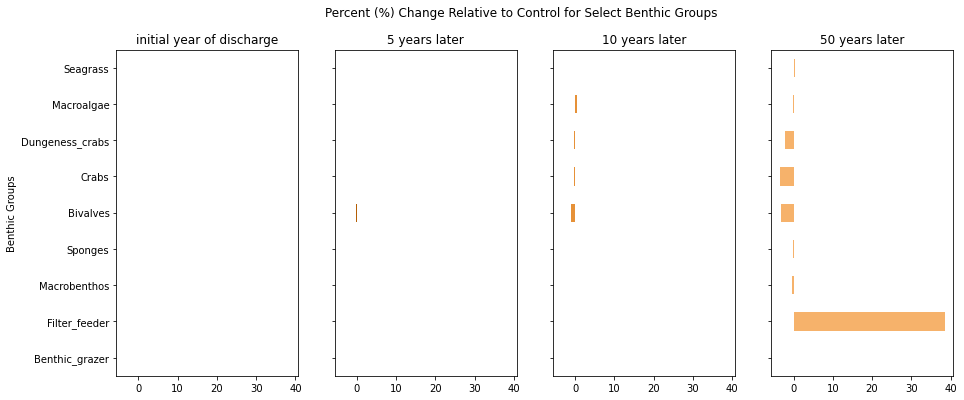

In [12]:
for scenario in scenarios:
    splot.boxplot_benthic(groups.benthos, scenario, control, start, days, data)

## Whole Salish Sea

Plot depth profiles for 4 time periods

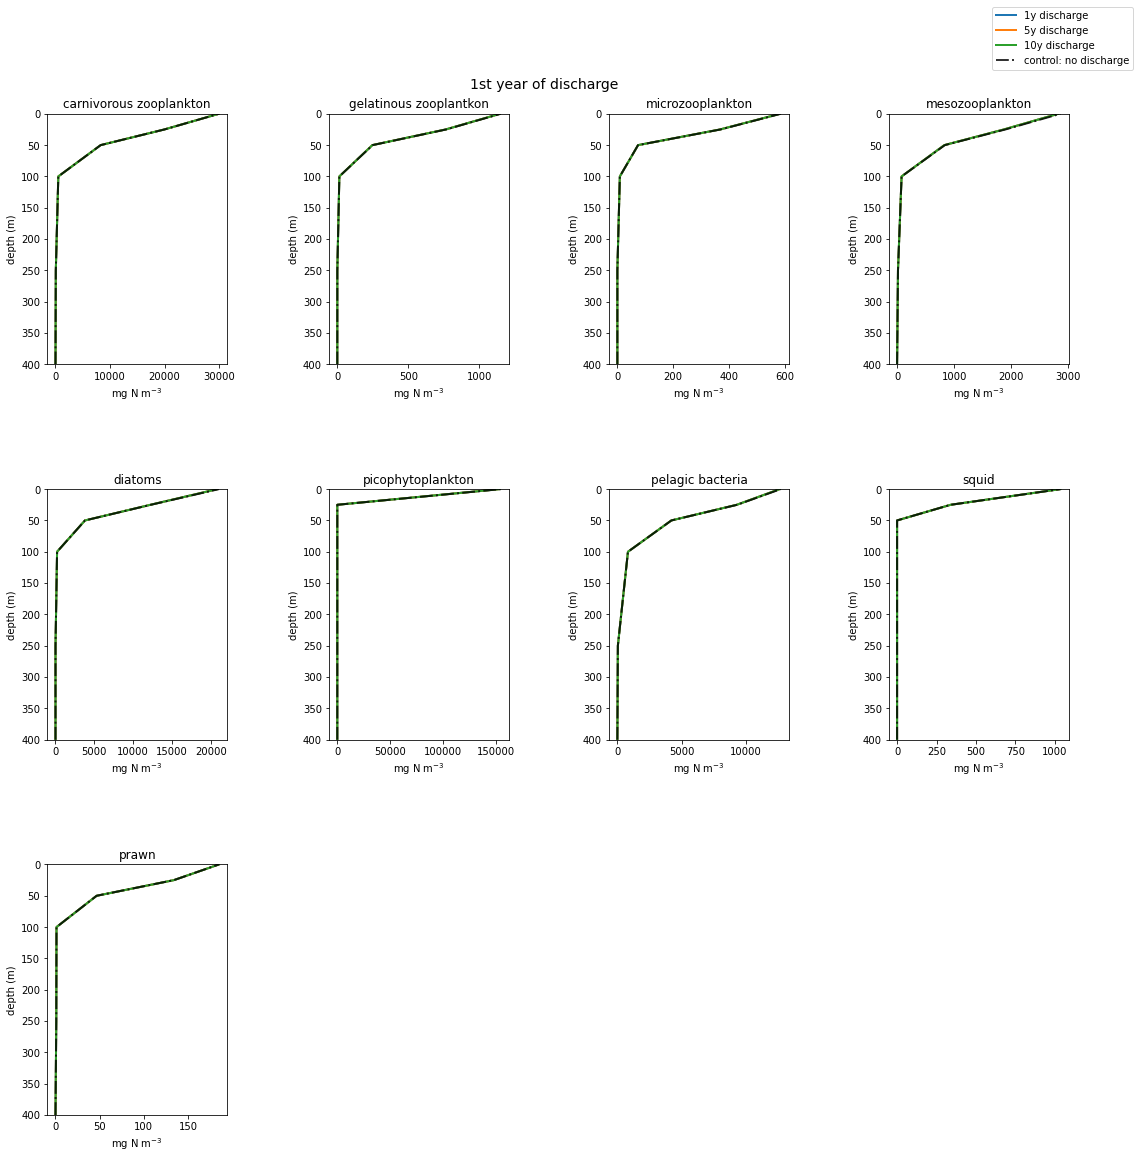

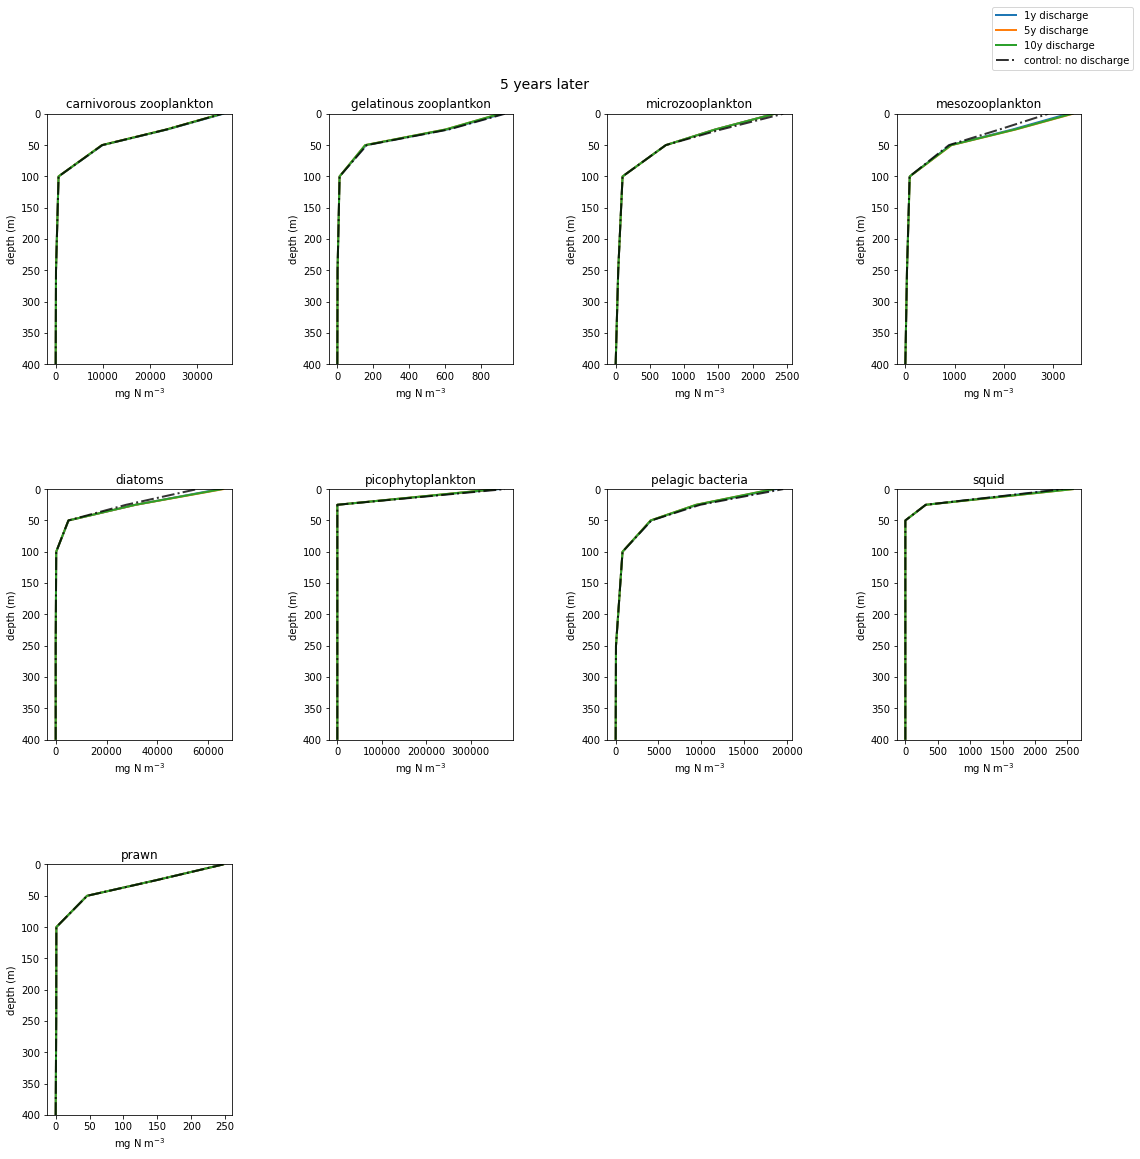

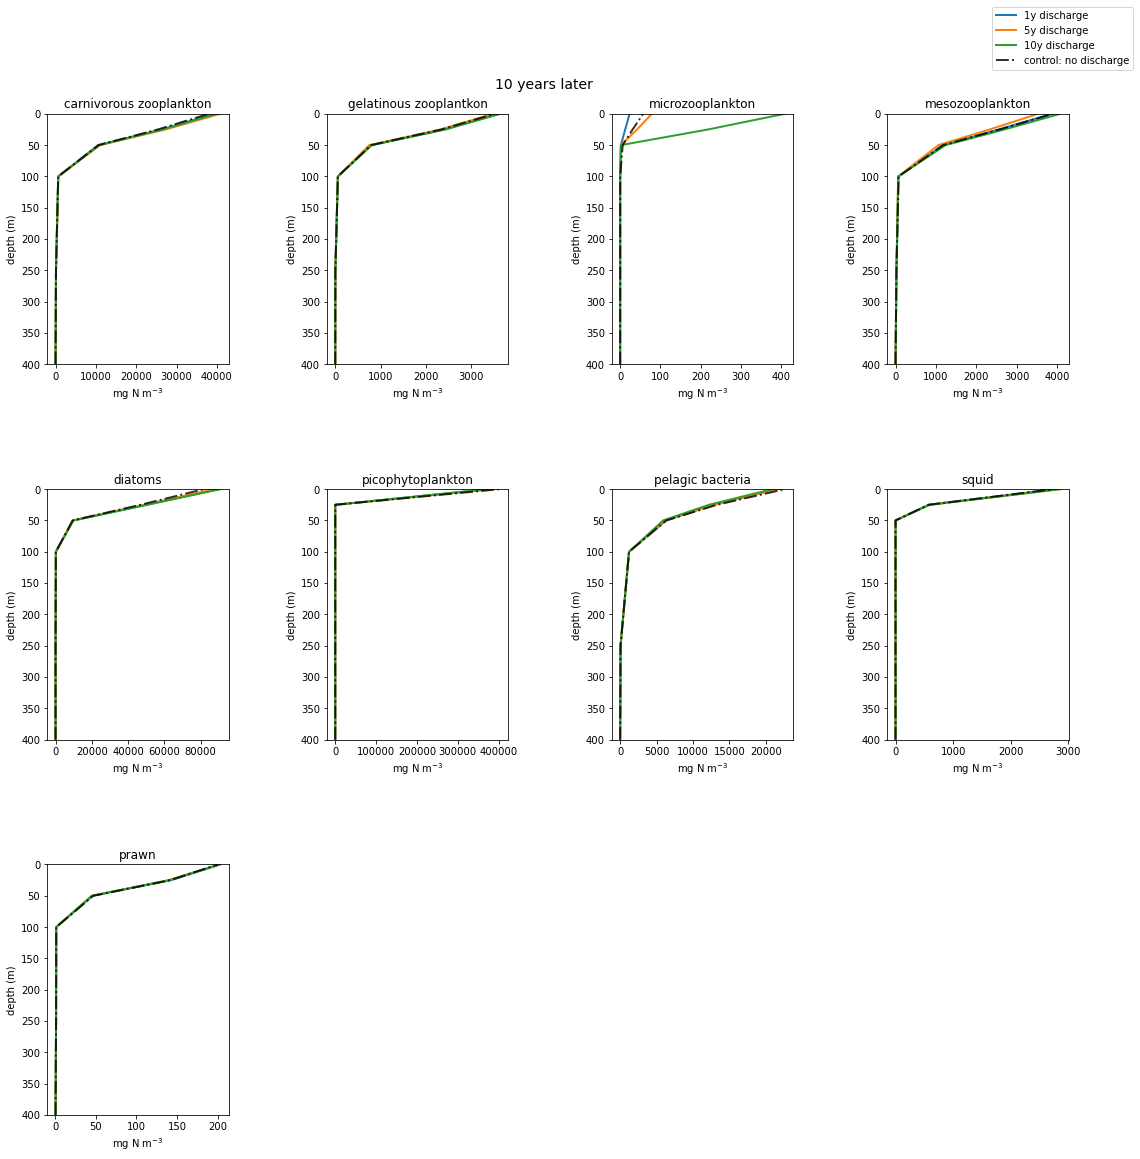

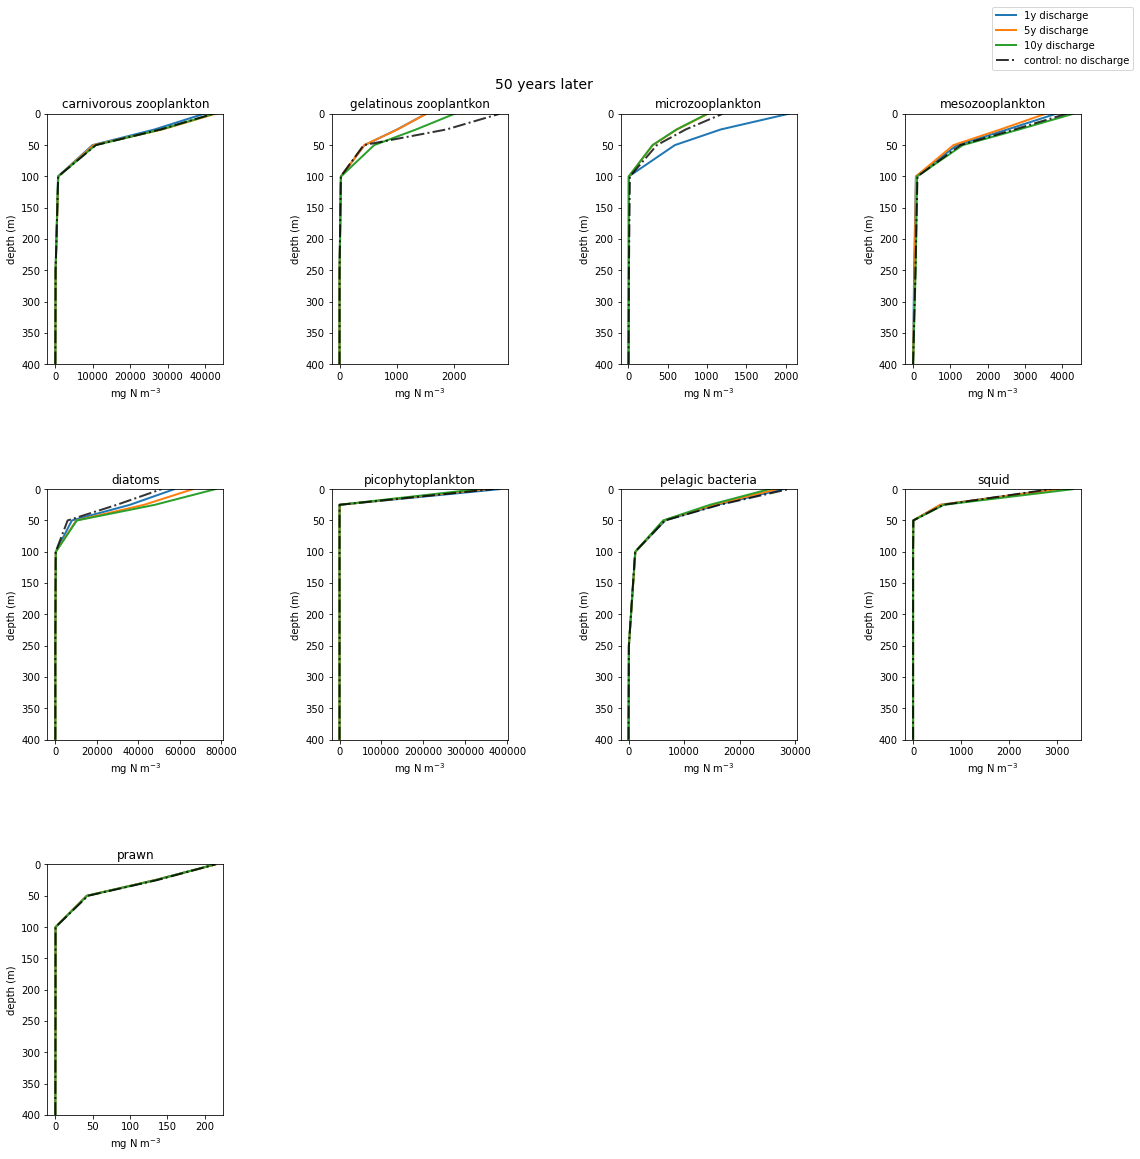

In [46]:
group = groups.planktonic
for day in days:
    fig = plt.figure(figsize=(15, 15), facecolor='white', constrained_layout=True)
    gs = plt.GridSpec(3, 4, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1, 1], figure=fig) 

    discharge_time = {55:'1st year of discharge', 75:'5 years later', 95:'10 years later', 220:'50 years later'}

    depth = [400, 250, 100, 50, 25, 0]


    for species in group:

        bio_index = (list(group).index(species))

        if bio_index < 4:
            position = 0, bio_index
        elif bio_index > 7: 
            position = 2, bio_index-8
        else :
            position = 1, bio_index-4

        ax = fig.add_subplot(gs[position])
        
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][day,:,0:6], np.nan)
        p_control = pelagic_control.sum(axis=0)
        ax.set_ylim(400, 0)  # decreasing depth
        
        for scenario in scenarios:

            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][day,:,0:6], np.nan) # tonnes, take only water column layers
            p_oiled = pelagic_oiled.sum(axis=0)
            ax.plot(p_oiled, depth, linewidth = 2)
        ax.plot(p_control, depth, '-.k', linewidth = 2, alpha=0.8)
        ax.set_title(species);
        ax.set_ylabel('depth (m)')
        ax.set_xlabel('mg N m$^{-3}$')
    fig.legend(['1y discharge','5y discharge','10y discharge','control: no discharge'],bbox_to_anchor=(1.05, 1), loc='lower right');  # place the legend outside)
    fig.suptitle(discharge_time[day], fontsize=14)

## Regions

In [50]:
#regions by Atlantis boxes
JdF_west = [1,2,3,4]
JdF_east = [5,6,7,8,9,10,11]
Haro_Boundary = [60,33,34,35,36]
SoG_south = [54,64,68,79]
SoG_center = [80,81,82,83,84,85]
SoG_north = [88,92,94,98,101,102]
PS_main = [20,21,23,26]

### net over the whole model run (75 years)

In [51]:
run_end = time.size-1

In [18]:
print(time[start])
print(time[run_end])

2016-12-14T14:00:00.000000000
2091-12-06T14:00:00.000000000


### Plankton

In [47]:
planktonic = {
    'carnivorous zooplankton':'Carniv_Zoo', 'gelatinous zooplantkon':'Gelat_Zoo', 'microzooplankton':'MicroZoo',
    'mesozooplankton':'Zoo', 'diatoms':'Diatom', 'picophytoplankton':'PicoPhytopl', 'pelagic bacteria':'Pelag_Bact',
    'squid':'Squid', 'prawn': 'Prawn', 
}

In [48]:
def plot_depth_profile(group, scenarios, control, start, end, region):

    fig = plt.figure(figsize=(15, 15), facecolor='white')
    gs = plt.GridSpec(3, 4, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1, 1]) 

    depth = [400, 250, 100, 50, 25, 0]

    for species in group:

        bio_index = (list(group).index(species))

        if bio_index < 4:
            position = 0, bio_index
        elif bio_index > 7: 
            position = 2, bio_index-8
        else :
            position = 1, bio_index-4

        ax = fig.add_subplot(gs[position])
    
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,region,0:6], np.nan)
        p_control = pelagic_control.sum(axis=1)
        p_control = p_control.sum(axis=0)
        ax.set_ylim(400, 0)  # decreasing depth
        
        for scenario in scenarios:

            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,region,0:6], np.nan) # tonnes, take only water column layers
            p_oiled = pelagic_oiled.sum(axis=1)
            p_oiled = p_oiled.sum(axis=0)
            ax.plot(p_oiled, depth, linewidth = 2)
        ax.plot(p_control, depth, '-.k', linewidth = 2, alpha=0.8)
        ax.set_title(species);
    ax.legend(['1y discharge','5y discharge','10y discharge','control: no discharge'],bbox_to_anchor=(1.05, 1)); #, loc='lower right');  # place the legend outside)

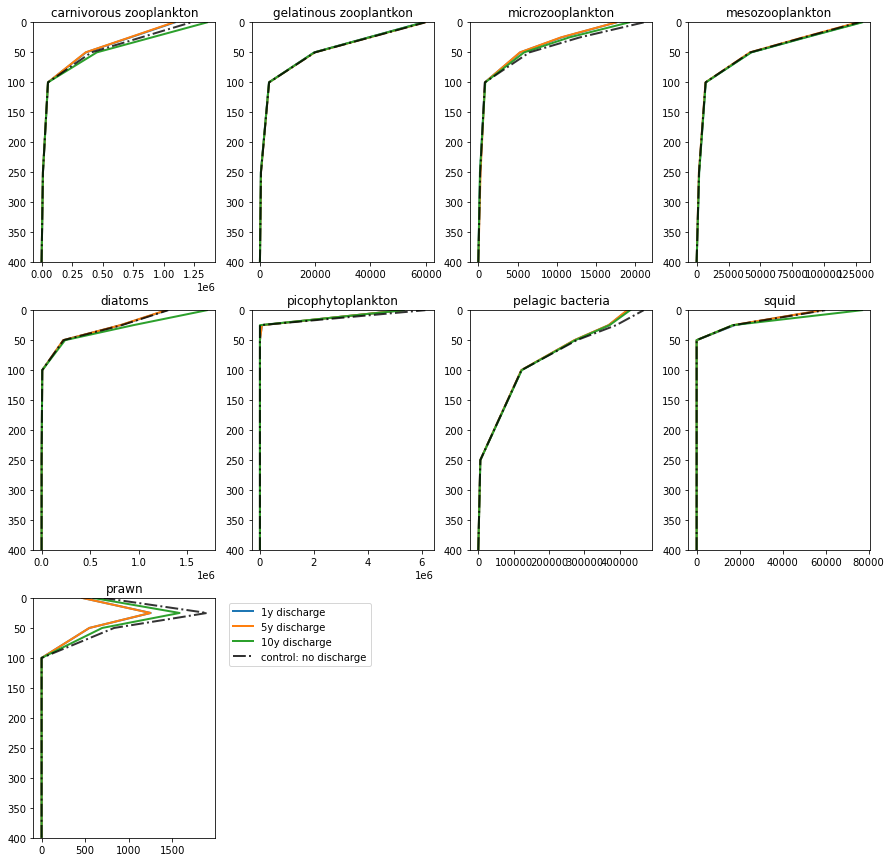

In [52]:
plot_depth_profile(planktonic, scenarios, control, start, run_end, SoG_center)

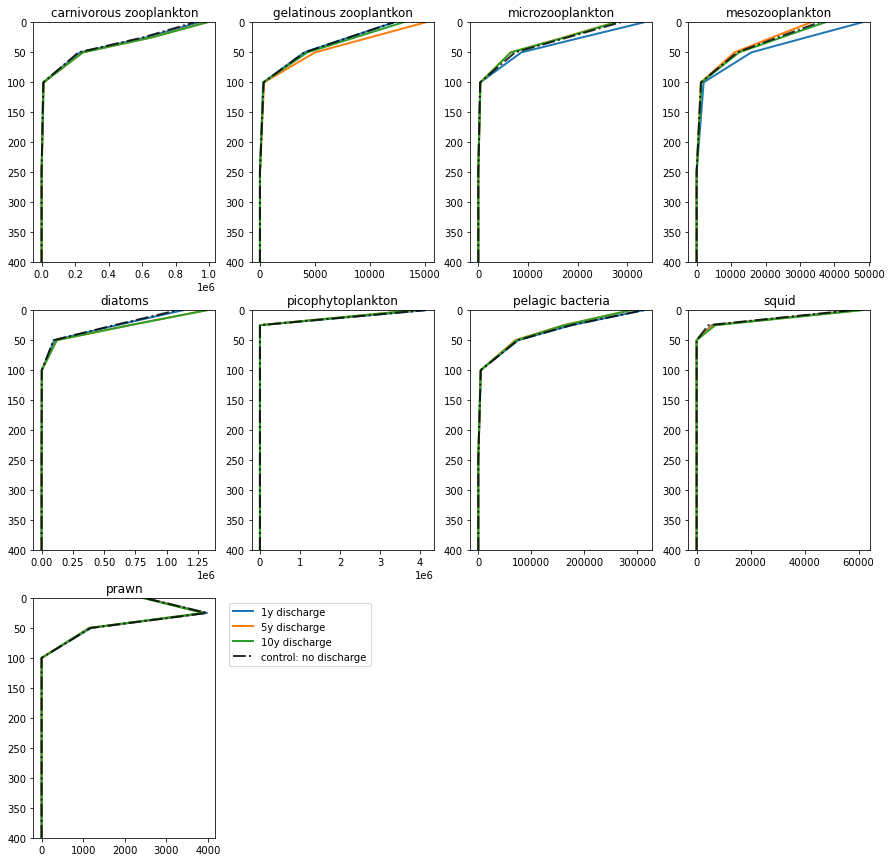

In [53]:
plot_depth_profile(planktonic, scenarios, control, start, run_end, Haro_Boundary)

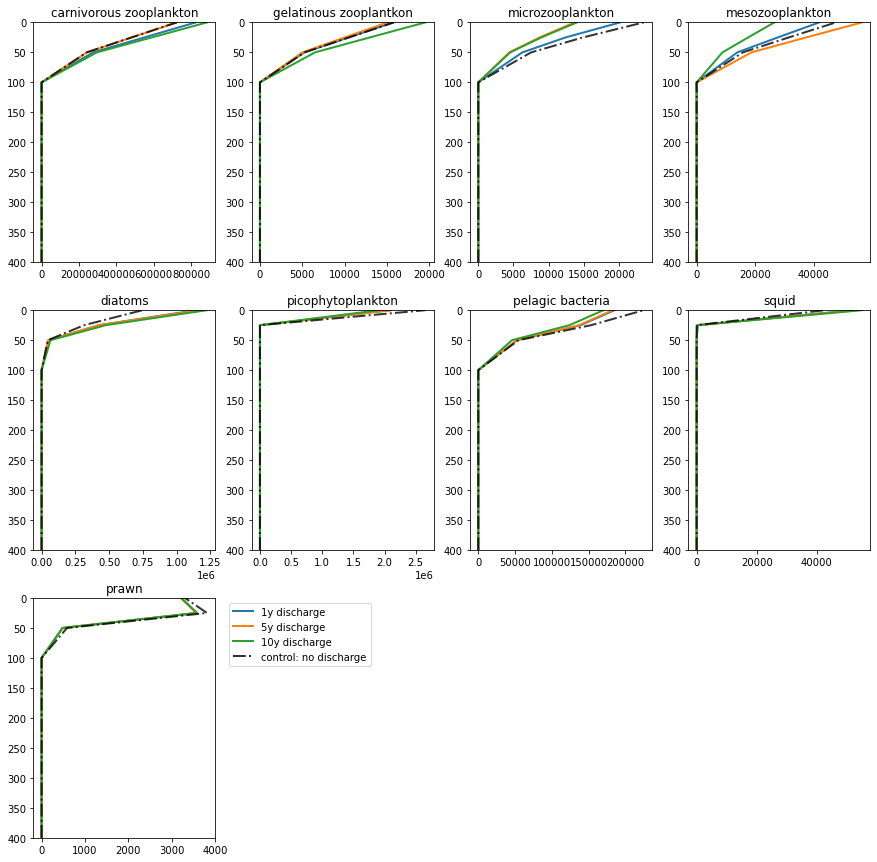

In [54]:
plot_depth_profile(planktonic, scenarios, control, start, run_end, SoG_south)

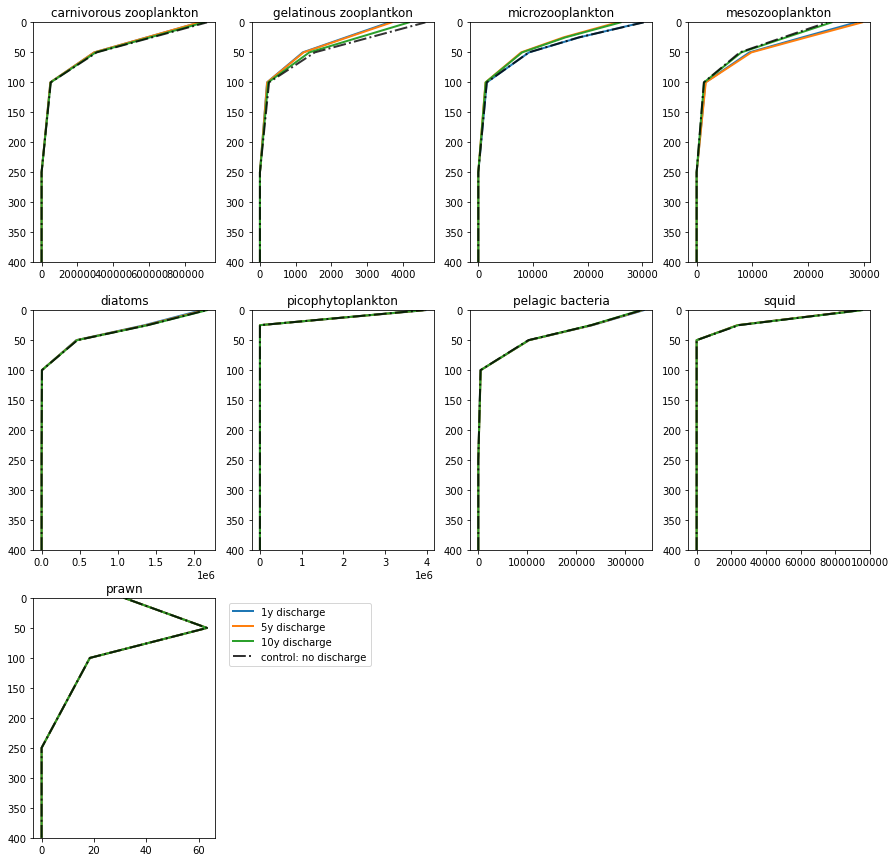

In [55]:
plot_depth_profile(planktonic, scenarios, control, start, run_end, SoG_north)

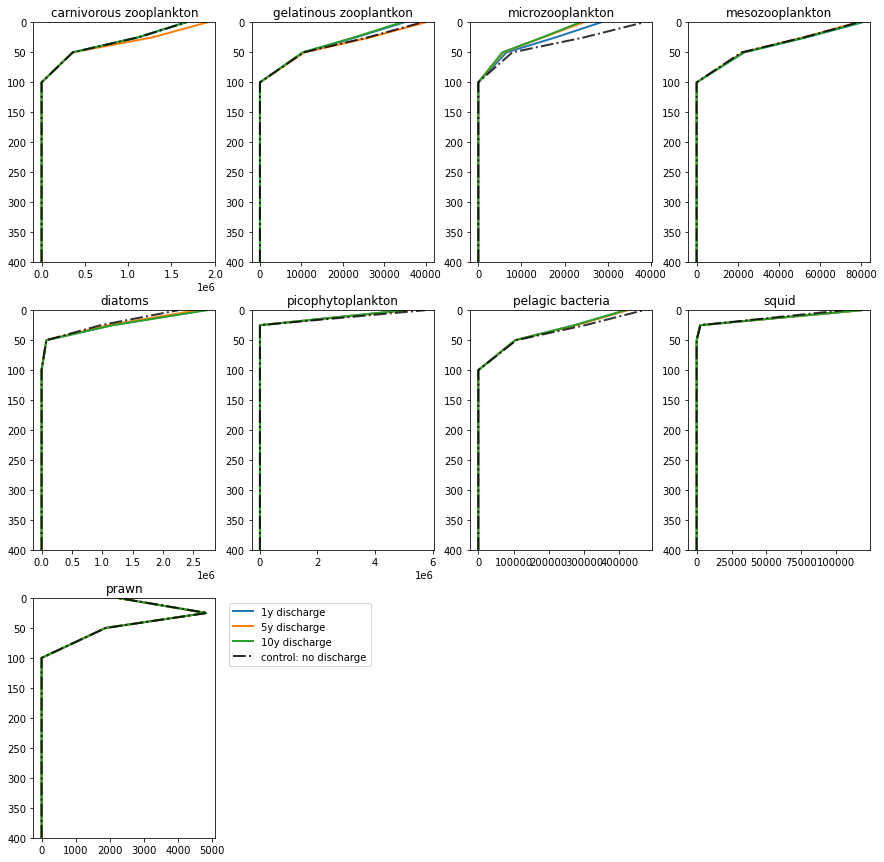

In [56]:
plot_depth_profile(planktonic, scenarios, control, start, run_end, JdF_east)

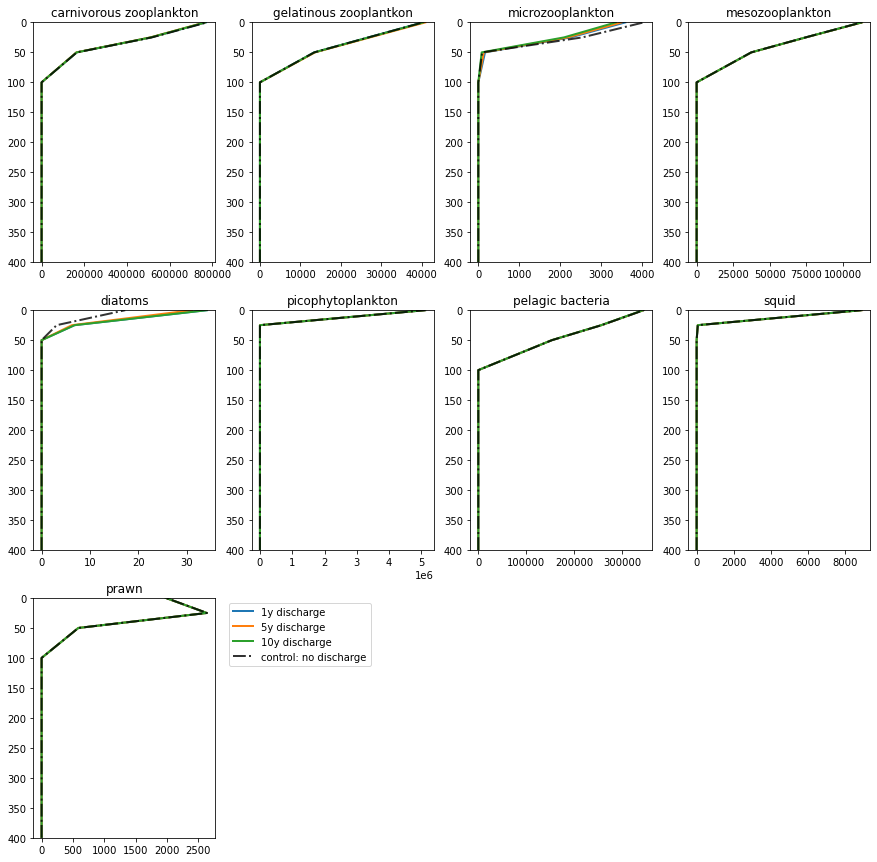

In [57]:
plot_depth_profile(planktonic, scenarios, control, start, run_end, JdF_west)

Exploring the txt files of annual output per box

In [59]:
control_txt_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_control/outputSalishSeaBoxBiomass.txt"
scenario2019_txt_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2019/outputSalishSeaBoxBiomass.txt"
scenario2024_txt_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2024/outputSalishSeaBoxBiomass.txt"
scenario2029_txt_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2029/outputSalishSeaBoxBiomass.txt"

In [60]:
scenarios_txt = [scenario2019_txt_file, scenario2024_txt_file, scenario2029_txt_file]

In [65]:
location = Haro_Boundary

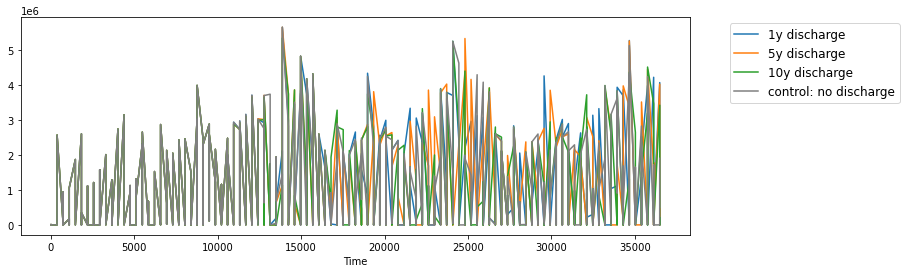

In [83]:
fig, ax = plt.subplots(figsize=(12, 4))

control_biomass = pd.read_csv(control_txt_file, sep=" ")
cbiomass = control_biomass.loc[control_biomass['Box'].isin(location)]
for scenario in scenarios_txt:
    biomass = pd.read_csv(scenario, sep=" ")
    sbiomass = biomass.loc[biomass['Box'].isin(location)]
    sbiomass.plot('Time', 'PS', ax=ax)
cbiomass.plot('Time', 'PS', color='grey', ax=ax)
ax.legend(['1y discharge','5y discharge','10y discharge','control: no discharge'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);

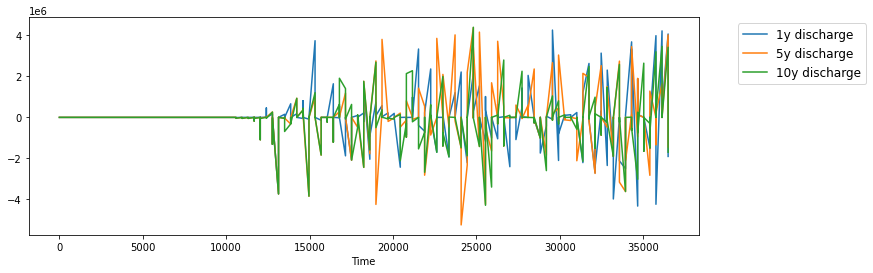

In [81]:
fig, ax = plt.subplots(figsize=(12, 4))

control_biomass = pd.read_csv(control_txt_file, sep=" ")
cbiomass = control_biomass.loc[control_biomass['Box'].isin(location)]
time_df = cbiomass.Time

for scenario in scenarios_txt:
    biomass = pd.read_csv(scenario, sep=" ")
    sbiomass = biomass.loc[biomass['Box'].isin(location)]
    diff = sbiomass.PS - cbiomass.PS
    diff_df = pd.concat([time_df, diff], axis=1)
    diff_df.plot('Time', 'PS', ax=ax)
ax.legend(['1y discharge','5y discharge','10y discharge','control: no discharge'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);

### Benthos

In [92]:
def plot_benthic_biomass(group, scenarios, control, time, start, end, region, y_min=None, y_max=None): 

    fig = plt.figure(figsize=(18, 14), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])  

    for species in group:

        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,region], np.nan)
        p_control = pelagic_control.sum(axis=1)

        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])

        for scenario in scenarios:

            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,region], np.nan) # tonnes
            p_oiled = pelagic_oiled.sum(axis=1)
            ax.plot(time[start:end], p_oiled, linewidth = 2) #alpha=0.5)

        ax.tick_params(labelsize=10)
        ax.set_ylabel('mg N$^{-3}$')
        ax.set_title(str(group[species]), fontsize = 12)
        ax.plot(time[start:end], p_control, '-.k', linewidth = 2) #,alpha=0.5)
    ax.legend(['1y discharge','5y discharge','10y discharge','control: no discharge'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);

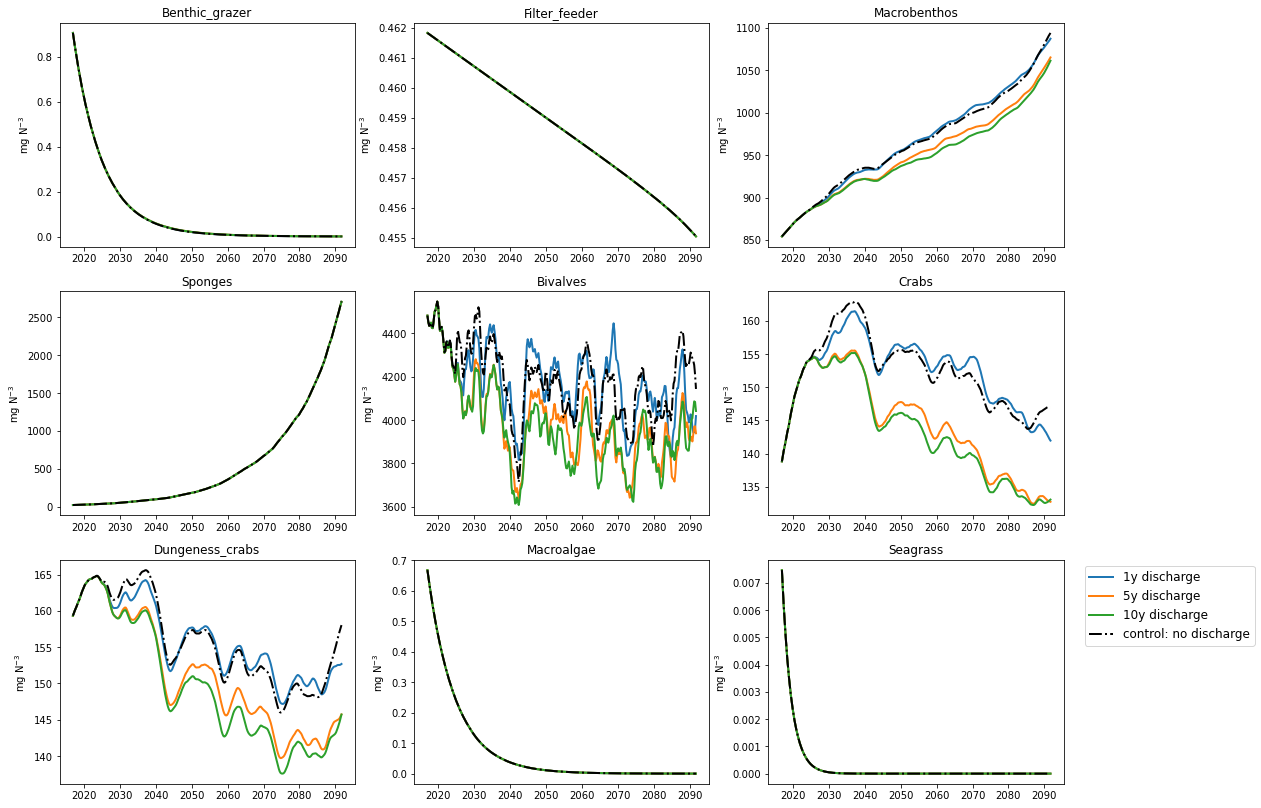

In [91]:
region = Haro_Boundary
plot_benthic_biomass(groups.benthos, scenarios, control, time, start, run_end, region)

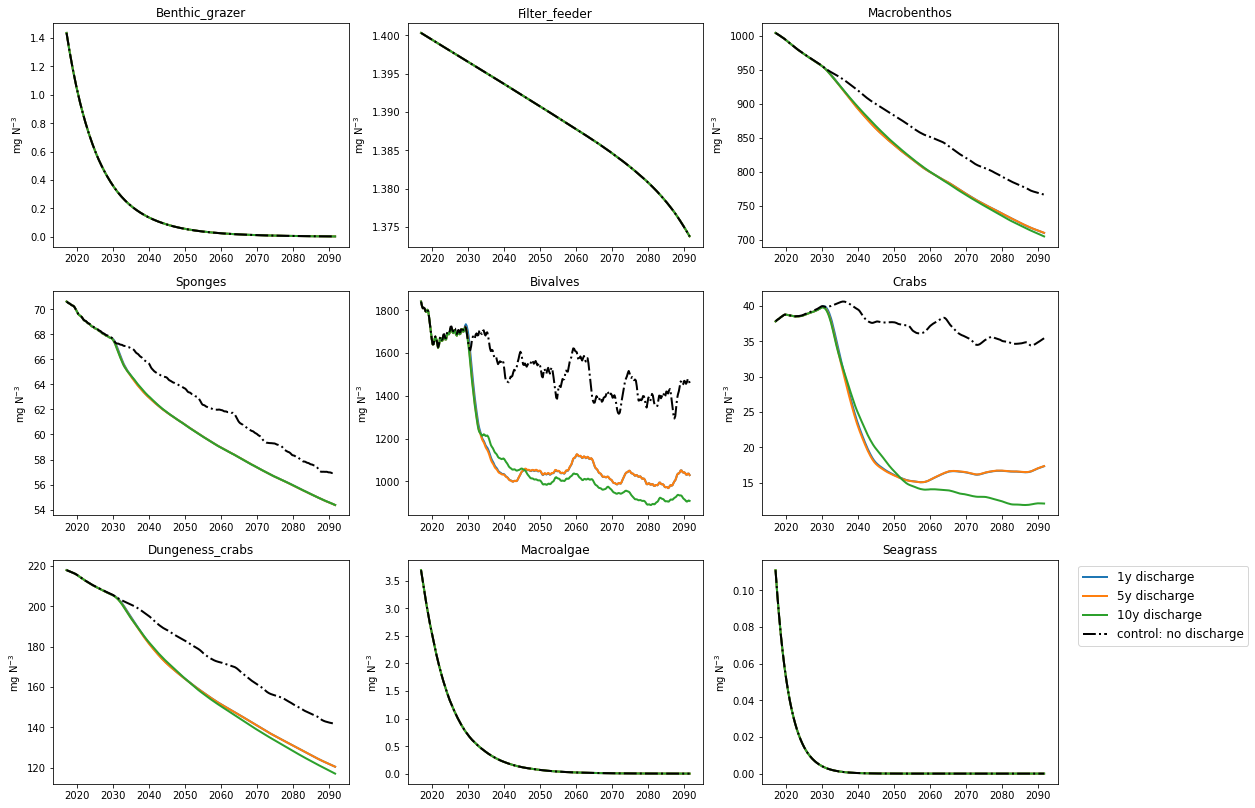

In [ ]:
region = SoG_center
plot_benthic_biomass(groups.benthos, scenarios, control, time, start, run_end, region)

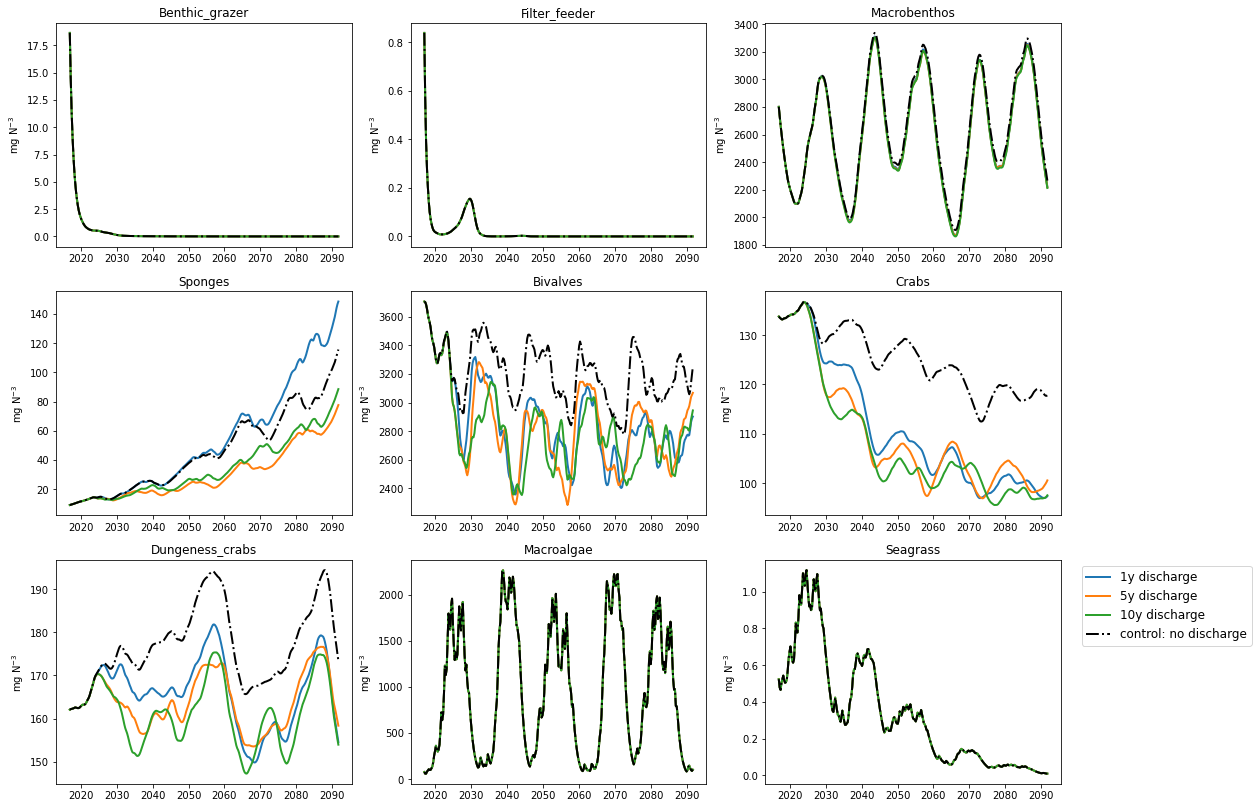

In [85]:
region = SoG_south
plot_benthic_biomass(groups.benthos, scenarios, control, time, start, run_end, region)

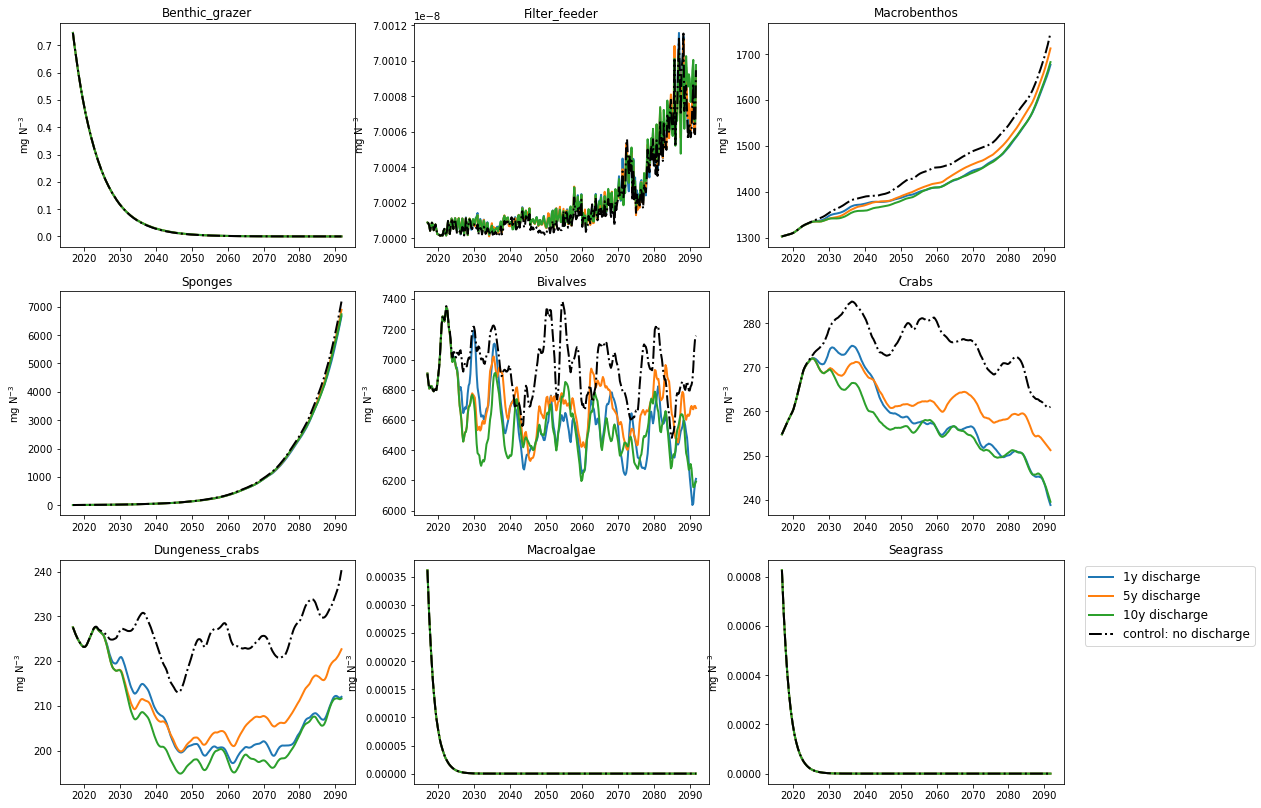

In [86]:
region = JdF_east
plot_benthic_biomass(groups.benthos, scenarios, control, time, start, run_end, region)

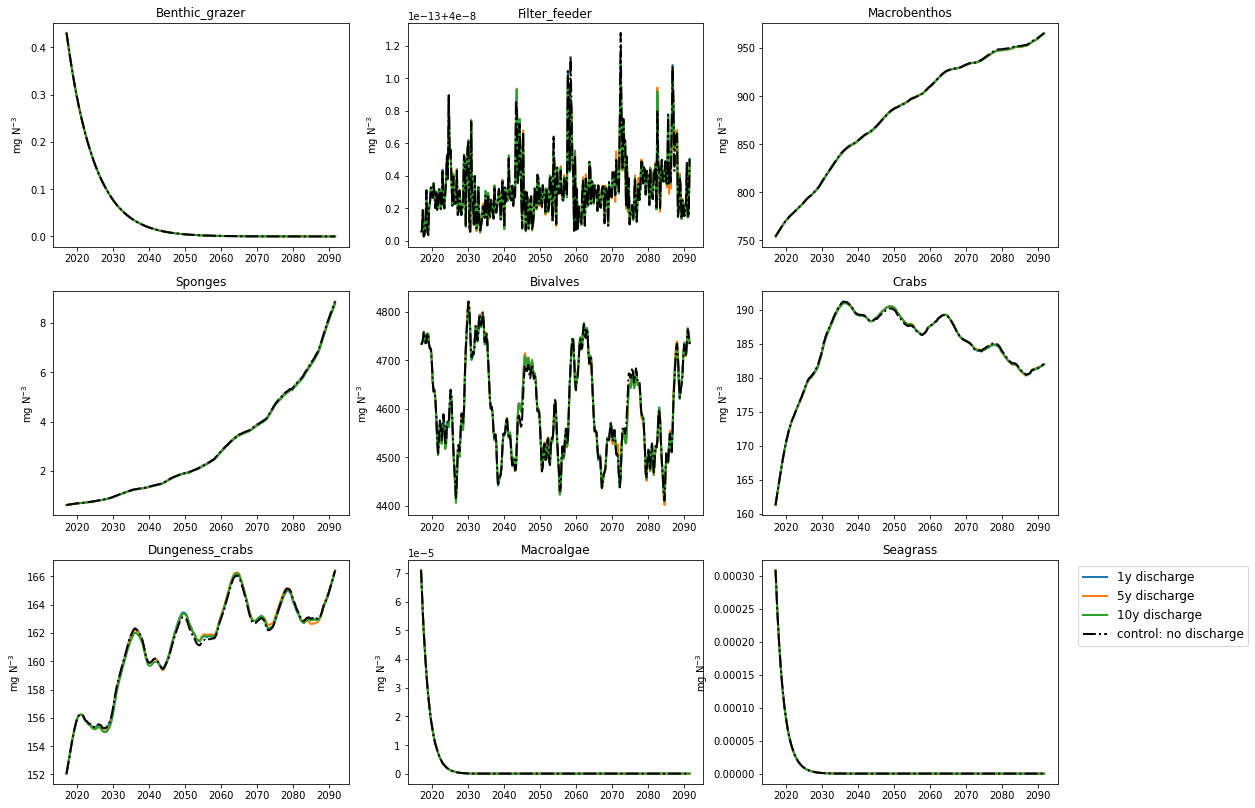

In [87]:
region = JdF_west
plot_benthic_biomass(groups.benthos, scenarios, control, time, start, run_end, region)

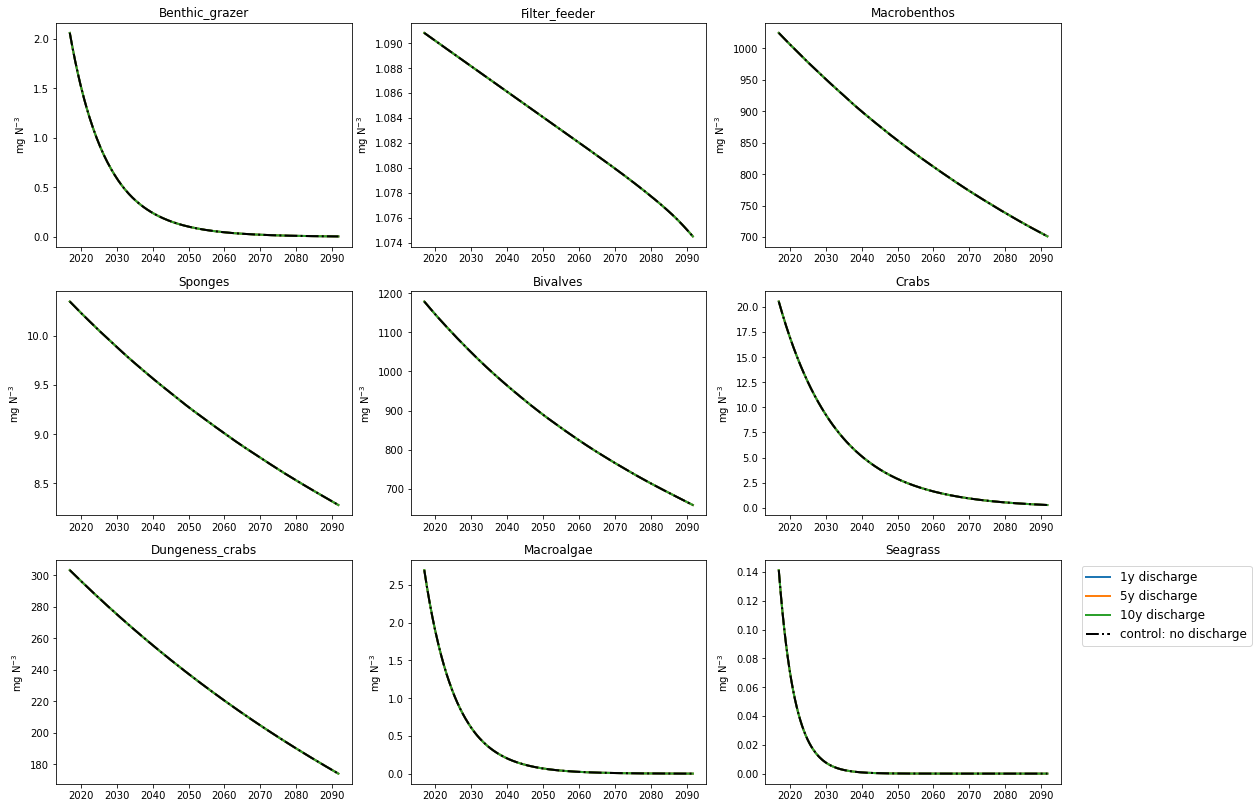

In [90]:
region = SoG_north
plot_benthic_biomass(groups.benthos, scenarios, control, time, start, run_end, region)